## Playing with Plotly, Seaborn, and other visualization 

Understand the underlying trend of the Zillow dataset on housing market

In [2]:
%matplotlib inline 
import matplotlib.pyplot as plt 
import matplotlib.ticker as tick 
import pandas as pd 
import seaborn as sns 
import squarify 
import missingno as msno

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import gc
from plotnine import *

plt.style.use('seaborn-pastel')

/Users/chloekwon/anaconda/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning:

The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.



In [3]:
#Import Data 

CITY_CROSSWALK_PATH = "./zecon/cities_crosswalk.csv"
CITY_TS_PATH = "./zecon/City_time_series.csv"
STATE_TS_PATH = "./zecon/State_time_series.csv"

In [4]:
state_df = pd.read_csv(STATE_TS_PATH, parse_dates = ['Date'])

In [5]:
state_df.tail(3)

,Date,RegionName,DaysOnZillow_AllHomes,HomesSoldAsForeclosuresRatio_AllHomes,InventorySeasonallyAdjusted_AllHomes,InventoryRaw_AllHomes,MedianListingPricePerSqft_1Bedroom,MedianListingPricePerSqft_2Bedroom,MedianListingPricePerSqft_3Bedroom,MedianListingPricePerSqft_4Bedroom,...,ZHVI_BottomTier,ZHVI_CondoCoop,ZHVI_MiddleTier,ZHVI_SingleFamilyResidence,ZHVI_TopTier,ZRI_AllHomes,ZRI_AllHomesPlusMultifamily,ZriPerSqft_AllHomes,Zri_MultiFamilyResidenceRental,Zri_SingleFamilyResidenceRental
13023,2017-08-31,WestVirginia,NaN,0.3122,9680.0,10468.0,107.870370,80.304061,91.092999,93.516101,...,62700.0,113000.0,99800.0,99700.0,169700.0,874.0,874.0,0.672,870.0,874.0
13024,2017-08-31,Wisconsin,NaN,0.9433,28198.0,32809.0,139.960992,123.377384,122.988506,114.902206,...,106800.0,158900.0,167300.0,168200.0,277700.0,1180.0,1151.0,0.918,1062.0,1161.0
13025,2017-08-31,Wyoming,NaN,NaN,4690.0,5239.0,171.496617,149.791667,135.649671,147.134084,...,137800.0,189300.0,195400.0,195300.0,307800.0,1181.0,1145.0,0.916,1046.0,1153.0


In [6]:
print "Number of rows and columns in state_time_series: ", state_df.shape

Number of rows and columns in state_time_series:  (13026, 86)


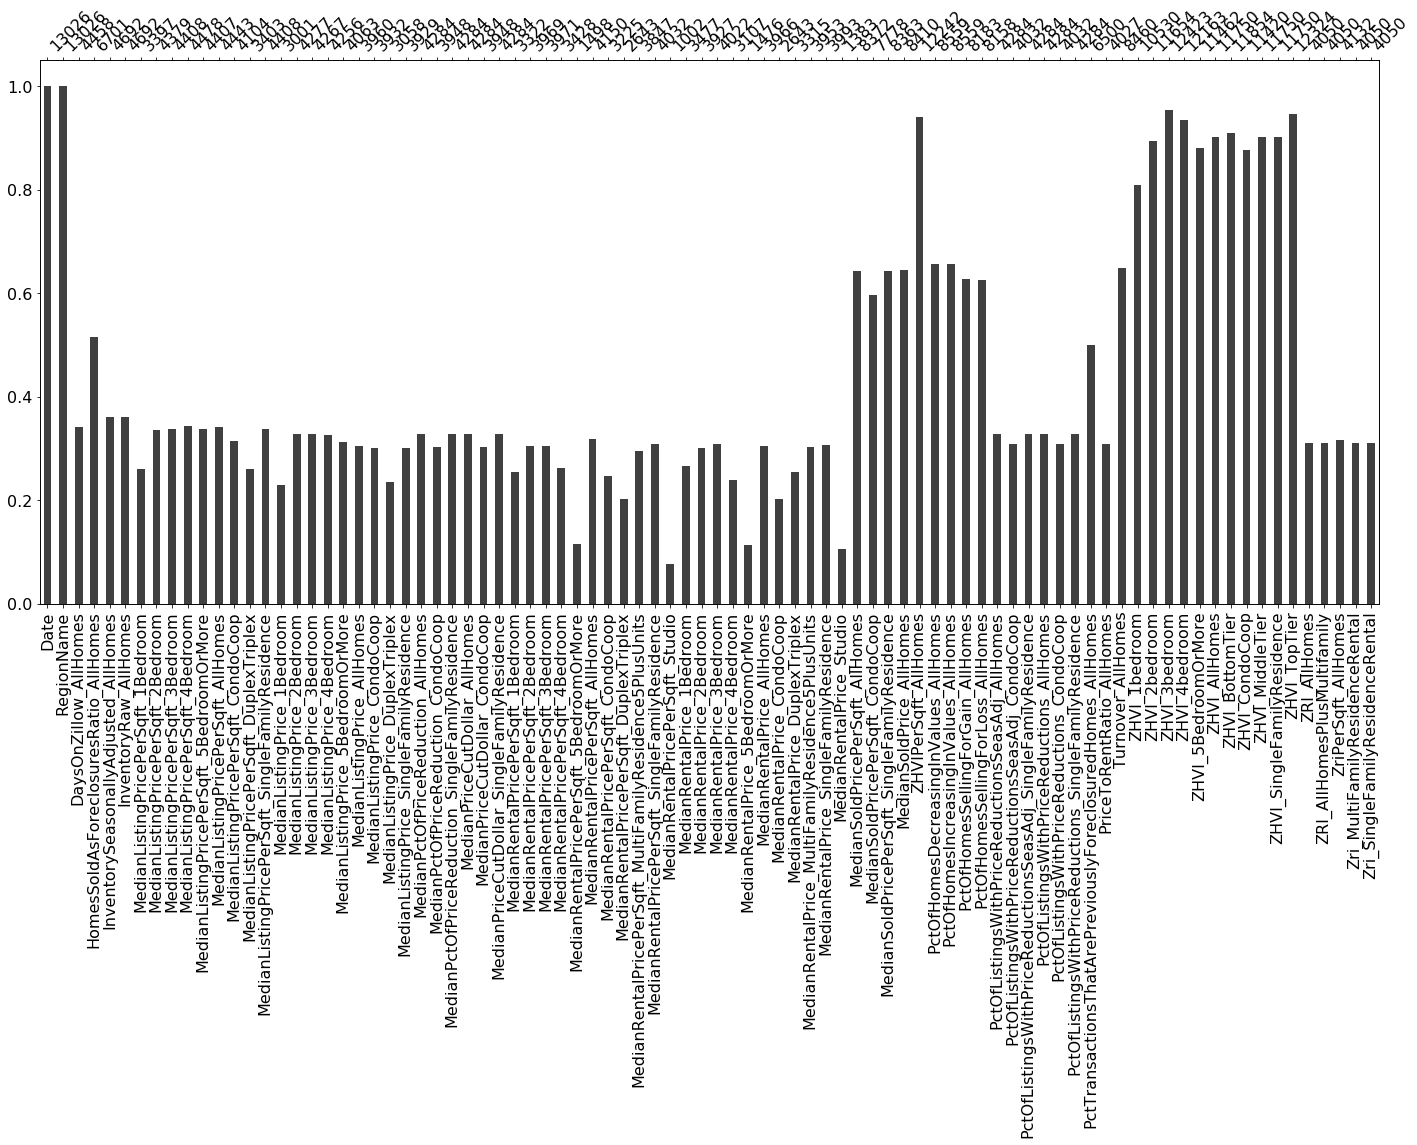

In [7]:
#Shows missing value of our dataset 
msno.bar(state_df)

In [12]:
#Percentage of missing value in our dataset 
missing = state_df.isnull().sum().sum()
print "Percentage of missing value: ", missing *100 / (state_df.shape[0]*state_df.shape[1])*1.0

Percentage of missing value:  56.0


In [14]:
#257 unique dates ranging from 1996 to 2017
print "Date Range: {} to {}".format(state_df['Date'].min(), state_df['Date'].max())
state_df['Date'].describe()

Date Range: 1996-04-30 00:00:00 to 2017-08-31 00:00:00


count                   13026
unique                    257
top       2012-10-31 00:00:00
freq                       52
first     1996-04-30 00:00:00
last      2017-08-31 00:00:00
Name: Date, dtype: object

Number of unique states:  52


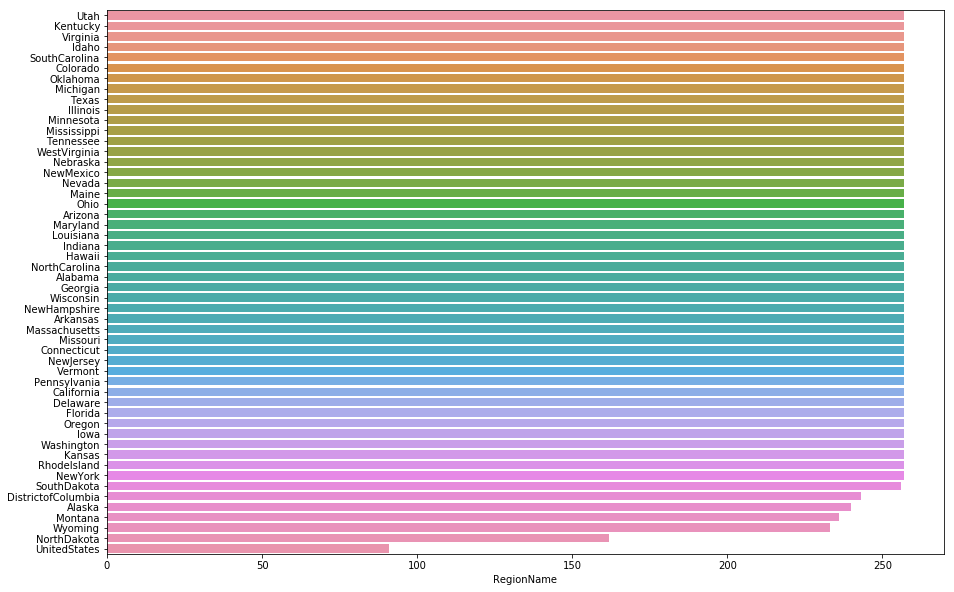

In [17]:
#Most states have about the same size data but North Dakota have the least. Also, there are 52 states that include 
#United States and District of Columnia
count = state_df['RegionName'].value_counts().to_frame()
print 'Number of unique states: ', state_df['RegionName'].nunique()
plt.figure(figsize=(15,10))
sns.barplot(count['RegionName'], count.index)

ZRI_AllHomes = A smoothed seasonally adjusted measure of the median estimated market rate rent across a given region and housing type

So below, we see that data on median market rate rent didn't exist before 2011 and after that, it has increased. 

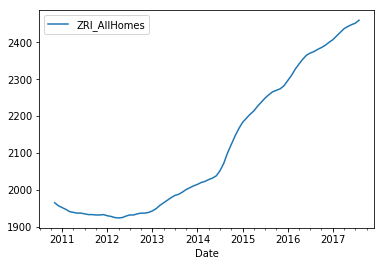

In [11]:
state_df[state_df['RegionName'] == 'California'].plot(x='Date', y='ZRI_AllHomes')

In [108]:
state_df.columns

Index([u'Date', u'RegionName', u'DaysOnZillow_AllHomes',
       u'HomesSoldAsForeclosuresRatio_AllHomes',
       u'InventorySeasonallyAdjusted_AllHomes', u'InventoryRaw_AllHomes',
       u'MedianListingPricePerSqft_1Bedroom',
       u'MedianListingPricePerSqft_2Bedroom',
       u'MedianListingPricePerSqft_3Bedroom',
       u'MedianListingPricePerSqft_4Bedroom',
       u'MedianListingPricePerSqft_5BedroomOrMore',
       u'MedianListingPricePerSqft_AllHomes',
       u'MedianListingPricePerSqft_CondoCoop',
       u'MedianListingPricePerSqft_DuplexTriplex',
       u'MedianListingPricePerSqft_SingleFamilyResidence',
       u'MedianListingPrice_1Bedroom', u'MedianListingPrice_2Bedroom',
       u'MedianListingPrice_3Bedroom', u'MedianListingPrice_4Bedroom',
       u'MedianListingPrice_5BedroomOrMore', u'MedianListingPrice_AllHomes',
       u'MedianListingPrice_CondoCoop', u'MedianListingPrice_DuplexTriplex',
       u'MedianListingPrice_SingleFamilyResidence',
       u'MedianPctOfPriceReductio

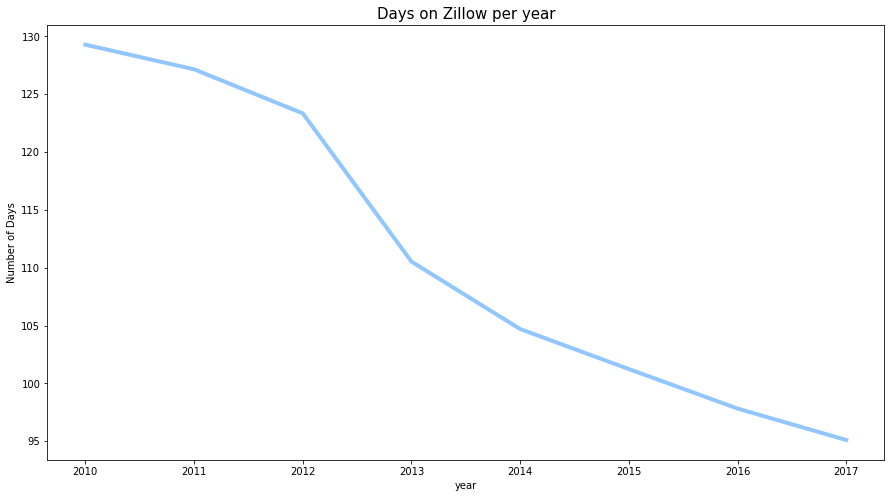

In [93]:
#Number of Days to sell the house (i.e. how long was the house on the market). It continued to decrease from 2010. 
state_df.groupby(state_df['year'])['DaysOnZillow_AllHomes'].mean().dropna().plot(linewidth=4, figsize=(15,8))
plt.title('Days on Zillow per year', fontsize=15)
plt.ylabel('Number of Days')
plt.show()

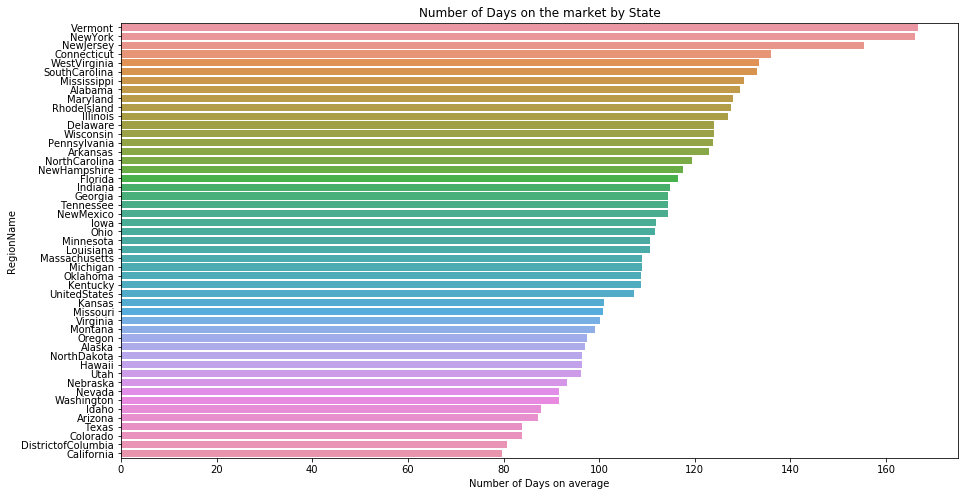

In [100]:
#Vermont, New York, and New Jersey has the most number of days to sell the house on the market. 
plt.figure(figsize=(15,8))
sns.barplot(state_df.groupby(state_df['RegionName'])['DaysOnZillow_AllHomes'].mean().dropna().sort_values(ascending=False).values,\
            state_df.groupby(state_df['RegionName'])['DaysOnZillow_AllHomes'].mean().dropna().sort_values(ascending=False).index)
plt.xlabel('Number of Days on average')
plt.title('Number of Days on the market by State')
plt.show()

In [95]:
#Let's resample monthly by median 

state_month = state_df.resample('M', on='Date').median()
state_month = state_month.reset_index()
state_month.shape

(257, 87)

In [96]:
data = [go.Scatter(x=state_month['Date'], y=state_month['DaysOnZillow_AllHomes'], line=dict(color='#17BECF'))]
layout = {'title': 'Days On Zillow All Homes', 'font': dict(size=16),'xaxis':{'range':['2010-01-01','2017-08-01']}}
py.iplot({'data':data, 
          'layout':layout})

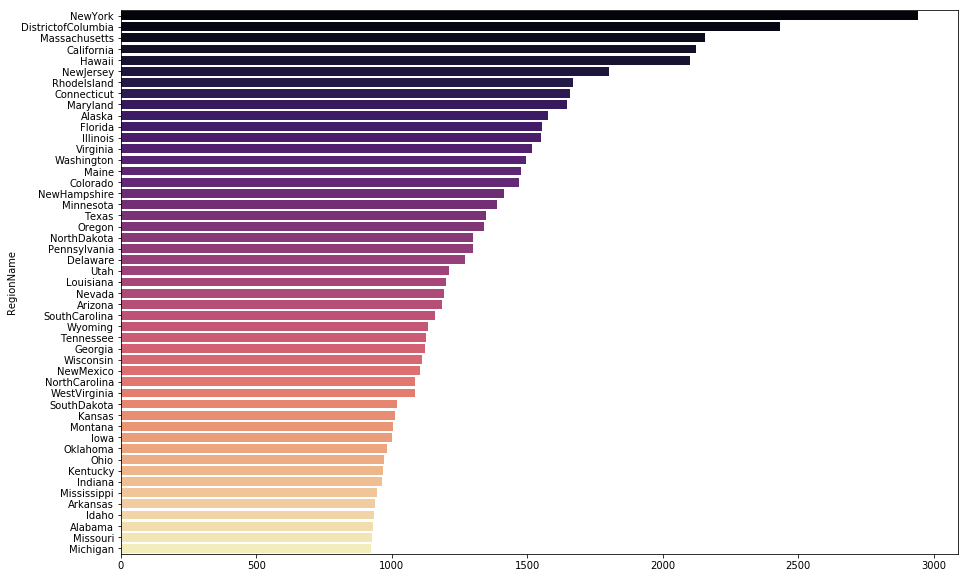

In [86]:
#median value by state - New York is clearly leading in median rental price of all homes 
state_vice = state_df.groupby('RegionName').median()
plt.figure(figsize=(15,10))
sns.barplot(state_df.groupby(state_df['RegionName'])['MedianRentalPrice_AllHomes'].mean().dropna().sort_values(ascending=False).values,\
            state_df.groupby(state_df['RegionName'])['MedianRentalPrice_AllHomes'].mean().dropna().sort_values(ascending=False).index, palette='magma' )

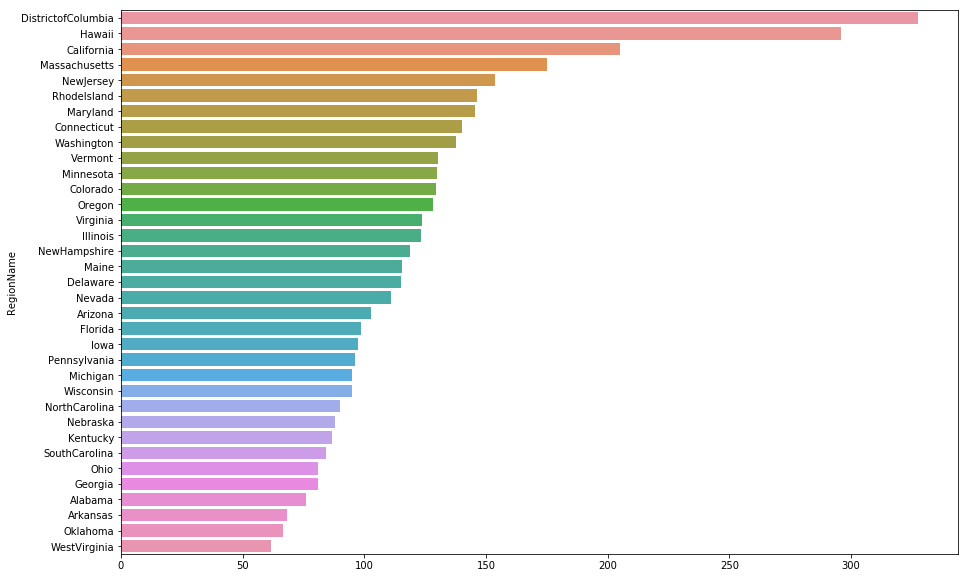

In [116]:
plt.figure(figsize=(15,10))
sns.barplot(state_df.groupby(state_df['RegionName'])['MedianSoldPricePerSqft_AllHomes'].mean().dropna().sort_values(ascending=False).values,\
            state_df.groupby(state_df['RegionName'])['MedianSoldPricePerSqft_AllHomes'].mean().dropna().sort_values(ascending=False).index )

In [65]:
state_df['year'] = state_df['Date'].dt.year
state_df['month'] = state_df['Date'].dt.month

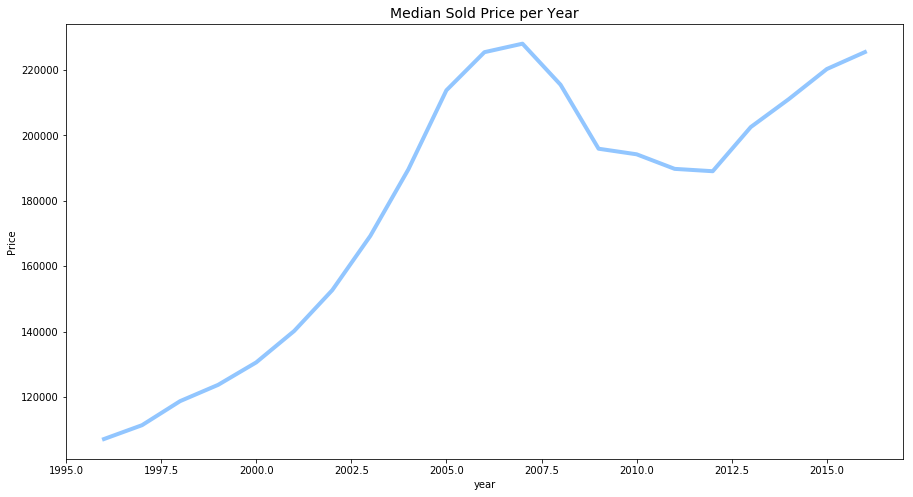

In [74]:
state_df.groupby(state_df['year'])['MedianSoldPrice_AllHomes'].mean().plot(linewidth=4, figsize=(15,8))
plt.title('Median Sold Price per Year', fontsize=14)
plt.ylabel('Price')
plt.show()

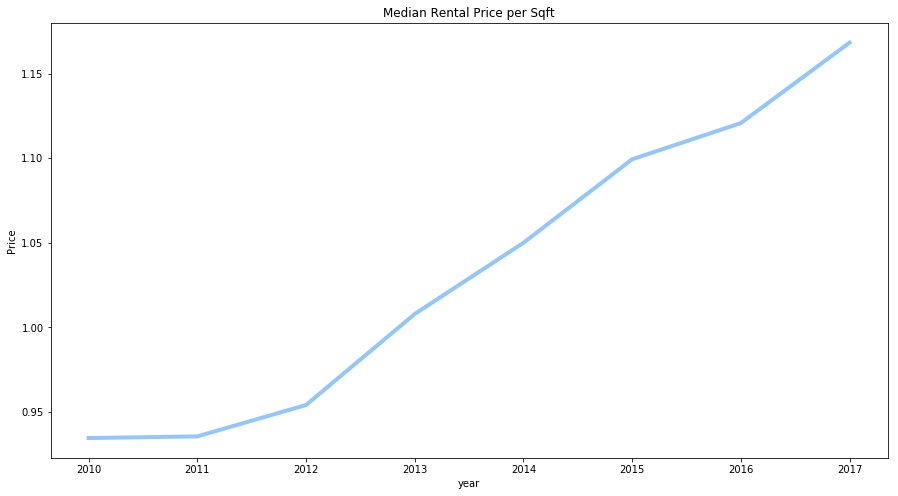

In [77]:
#They only had data from 2010 but we can see that in comparison to the Median sold price, it increased faster and quicker
#with no downward lag - possibly because of the increase in interest rate. 
state_df.groupby(state_df['year'])['MedianRentalPricePerSqft_AllHomes'].mean().dropna().plot(linewidth=4, figsize=(15,8))
plt.title('Median Rental Price per Sqft')
plt.ylabel('Price')
plt.show()

In [42]:
#Inventory seasonally adjusted - there is a downward trend in inventory. The peak of inventory (there are more people 
#selling the house then buying which creates higher inventory) was between 2011-2012 but in 2017, it's almost half. 

data = [go.Scatter(x=state_month['Date'], y=state_month['InventorySeasonallyAdjusted_AllHomes'], line = dict(color='17BECF'), name='Seasonally'), 
       go.Scatter(x=state_month['Date'], y=state_month['InventoryRaw_AllHomes'], name = 'raw')]
layout = {'title':'Inventory', 'font' : dict(size=16), 'xaxis': {'range': ['2010-1-1', '2017-8-30']}}
py.iplot({'data' : data, 'layout':layout})


In [50]:
data= [go.Scatter(x=state_month['Date'], y=state_month['MedianRentalPricePerSqft_1Bedroom'], name = '1 Bedroom'), 
       go.Scatter(x=state_month['Date'], y=state_month['MedianRentalPricePerSqft_2Bedroom'], name = '2 Bedroom'),
       go.Scatter(x=state_month['Date'], y=state_month['MedianRentalPricePerSqft_3Bedroom'], name = '3 Bedroom'), 
       go.Scatter(x=state_month['Date'], y=state_month['MedianRentalPricePerSqft_4Bedroom'], name = '4 Bedroom'),
       go.Scatter(x=state_month['Date'], y=state_month['MedianRentalPricePerSqft_5BedroomOrMore'], name='5+ bedroom')]
layout = {'title':'Median Rental Price per sqft', 'font' : dict(size=16), 'xaxis': {'range': ['2010-1-1', '2017-8-30']}}
py.iplot({'data' : data, 'layout':layout})


In [51]:
data=[go.Scatter(x=state_month['Date'], y=state_month['MedianRentalPricePerSqft_AllHomes'], name='All Homes'),
      go.Scatter(x=state_month['Date'], y=state_month['MedianRentalPricePerSqft_CondoCoop'], name='Condo Coop'),
      go.Scatter(x=state_month['Date'], y=state_month['MedianRentalPricePerSqft_DuplexTriplex'], name='Duplex'),
      go.Scatter(x=state_month['Date'], y=state_month['MedianRentalPricePerSqft_MultiFamilyResidence5PlusUnits'], name='multi'),
      go.Scatter(x=state_month['Date'], y=state_month['MedianRentalPricePerSqft_SingleFamilyResidence'], name='Single Family'),
      go.Scatter(x=state_month['Date'], y=state_month['MedianRentalPricePerSqft_Studio'], name='Studio')]
layout = {'title':'Median Price per Sqft','font': dict(size=16), 'xaxis':{'range':['2010-1-1','2017-10-30']}}
py.iplot({'data': data, 'layout': layout})

In [52]:
data=[go.Scatter(x=state_month['Date'], y=state_month['Turnover_AllHomes'])]
layout={'title':'Turnover Rate', 'font': dict(size=10), 'xaxis':{'range':['2010-1-1','2017-10-30']}}
py.iplot({'data':data, 'layout': layout})

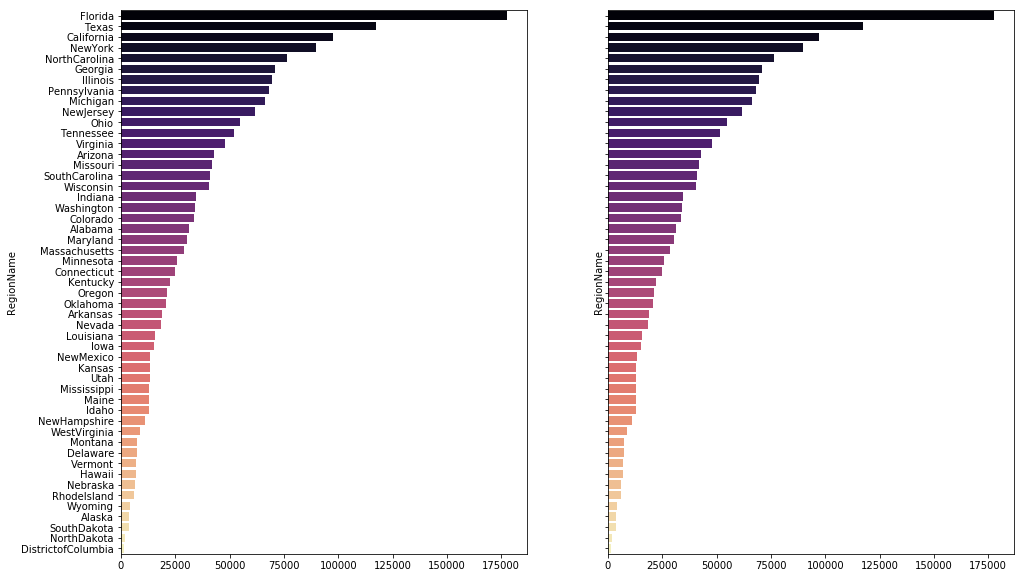

In [82]:
#Florida has the highest (seasonally adjusted and raw) inventory out of all states
fig, ax= plt.subplots(1,2, figsize=(16,10), sharey='all')
ax1, ax2 = ax.flatten()

sns.barplot(state_df.groupby('RegionName')['InventorySeasonallyAdjusted_AllHomes'].mean().dropna()\
            .sort_values(ascending=False).values, 
            state_df.groupby('RegionName')['InventorySeasonallyAdjusted_AllHomes'].mean().dropna()\
            .sort_values(ascending=False).index, palette = 'magma', ax=ax1)
sns.barplot(state_df.groupby('RegionName')['InventoryRaw_AllHomes'].mean().dropna()\
            .sort_values(ascending=False).values, 
            state_df.groupby('RegionName')['InventoryRaw_AllHomes'].mean().dropna()\
            .sort_values(ascending=False).index, palette = 'magma', ax=ax2)
plt.show()

In [103]:
data=[go.Scatter(x=state_month['Date'], y=state_month['MedianListingPrice_1Bedroom'], name = '1 Bedroom'), 
      go.Scatter(x=state_month['Date'], y=state_month['MedianListingPrice_2Bedroom'], name = '2 Bedroom'), 
      go.Scatter(x=state_month['Date'], y=state_month['MedianListingPrice_3Bedroom'], name = '3 Bedroom'), 
      go.Scatter(x=state_month['Date'], y=state_month['MedianListingPrice_4Bedroom'], name = '4 Bedroom'), 
      go.Scatter(x=state_month['Date'], y=state_month['MedianListingPrice_5BedroomOrMore'], name = '5+ Bedroom')]
layout = {'title':'Median Listing Price by Number of rooms', 'font': dict(size=16), 'xaxis': {'range': ['2010-1-1', '2017-10-30']}}
py.iplot({'data':data, 'layout':layout})

In [101]:
data=[go.Scatter(x=state_month['Date'], y=state_month['MedianListingPrice_AllHomes'], name = 'AllHomes'), 
      go.Scatter(x=state_month['Date'], y=state_month['MedianListingPrice_CondoCoop'], name = 'Condo/Coop'), 
      go.Scatter(x=state_month['Date'], y=state_month['MedianListingPrice_DuplexTriplex'], name = 'Duplex/Triplex'), 
      go.Scatter(x=state_month['Date'], y=state_month['MedianListingPrice_SingleFamilyResidence'], name = 'Single Family')] 
layout = {'title':'Median Listing Price by type of house', 'font': dict(size=16), 'xaxis': {'range': ['2010-1-1', '2017-10-30']}}
py.iplot({'data':data, 'layout':layout}) 
 

In [75]:
#In order to map to cholopleth via plotly, we need to change the current Region Name to the state abbrev. 
us_state_abbrev = {
'Alabama': 'AL',
'Alaska': 'AK',
'Arizona': 'AZ',
'Arkansas': 'AR',
'California': 'CA',
'Colorado': 'CO',
'Connecticut': 'CT',
'Delaware': 'DE',
'Florida': 'FL',
'Georgia': 'GA',
'Hawaii': 'HI',
'Idaho': 'ID',
'Illinois': 'IL',
'Indiana': 'IN',
'Iowa': 'IA',
'Kansas': 'KS',
'Kentucky': 'KY',
'Louisiana': 'LA',
'Maine': 'ME',
'Maryland': 'MD',
'Massachusetts': 'MA',
'Michigan': 'MI',
'Minnesota': 'MN',
'Mississippi': 'MS',
'Missouri': 'MO',
'Montana': 'MT',
'Nebraska': 'NE',
'Nevada': 'NV',
'NewHampshire': 'NH',
'NewJersey': 'NJ',
'NewMexico': 'NM',
'NewYork': 'NY',
'NorthCarolina': 'NC',
'NorthDakota': 'ND',
'Ohio': 'OH',
'Oklahoma': 'OK',
'Oregon': 'OR',
'Pennsylvania': 'PA',
'RhodeIsland': 'RI',
'SouthCarolina': 'SC',
'SouthDakota': 'SD',
'Tennessee': 'TN',
'Texas': 'TX',
'Utah': 'UT',
'Vermont': 'VT',
'Virginia': 'VA',
'Washington': 'WA',
'WestVirginia': 'WV',
'Wisconsin': 'WI',
'Wyoming': 'WY',
}
state_vice = state_vice.reset_index()
state_vice = state_vice.replace({'RegionName': us_state_abbrev})
state_vice.head()
del state_vice['index']

,RegionName,DaysOnZillow_AllHomes,HomesSoldAsForeclosuresRatio_AllHomes,InventorySeasonallyAdjusted_AllHomes,InventoryRaw_AllHomes,MedianListingPricePerSqft_1Bedroom,MedianListingPricePerSqft_2Bedroom,MedianListingPricePerSqft_3Bedroom,MedianListingPricePerSqft_4Bedroom,MedianListingPricePerSqft_5BedroomOrMore,...,ZHVI_BottomTier,ZHVI_CondoCoop,ZHVI_MiddleTier,ZHVI_SingleFamilyResidence,ZHVI_TopTier,ZRI_AllHomes,ZRI_AllHomesPlusMultifamily,ZriPerSqft_AllHomes,Zri_MultiFamilyResidenceRental,Zri_SingleFamilyResidenceRental
0,AL,131.5,1.2764,30706.5,30814.0,176.11423221,91.856028345,88.8196282121,97.7271435657,101.281984179,...,62000.0,132300.0,116800.0,116400.0,225400.0,949.0,951.0,0.624,968.0,951.5
1,AK,93.75,nan,3495.0,3625.0,172.619047619,161.878662651,154.090742541,152.611462579,125.027011834,...,168550.0,174150.0,243050.0,254250.0,350650.0,1775.0,1747.0,1.292,1617.0,1797.5
2,AZ,87.0,3.27325,37483.5,38085.5,132.25,112.025417692,125.883736934,122.950819672,124.62688697,...,99700.0,114000.0,157700.0,165000.0,294400.0,1154.0,1140.0,0.736,975.5,1175.5
3,AR,122.875,0.94855,19178.5,18991.5,108.734406342,75.0,84.9574121848,96.8102242381,103.962256723,...,56800.0,122300.0,102000.0,101900.0,181900.0,915.5,911.5,0.604,801.0,915.0
4,CA,78.75,3.32665,80108.0,83660.0,368.731563422,276.263335649,244.762185649,239.784613623,251.608512186,...,172200.0,311000.0,338000.0,343000.0,655900.0,2025.5,1997.0,1.315,1875.5,2036.0


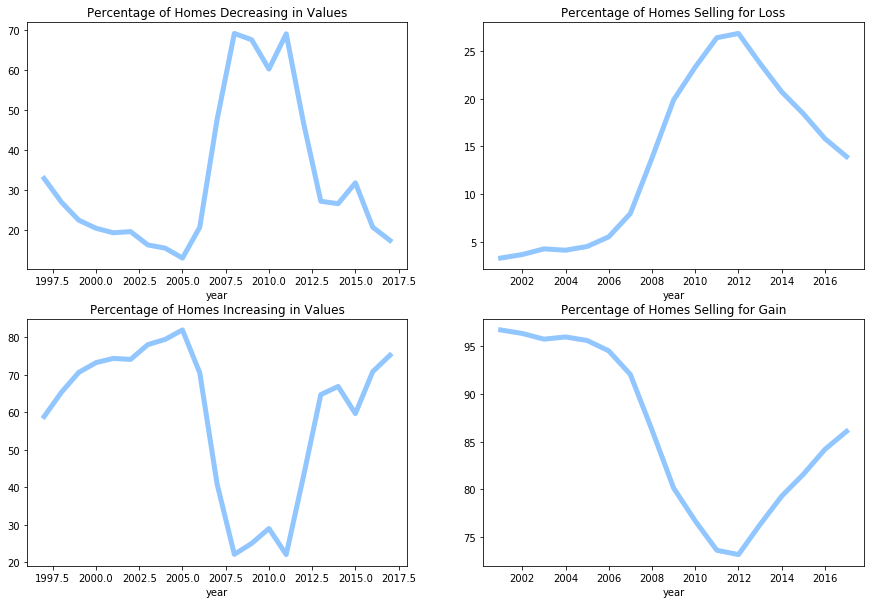

In [115]:
#Homes were decreasing in values around 2007 to 2010 but the values bounced back after 2012 and selling for gain after that. 

f, ax = plt.subplots(2,2, figsize=(15,10))

state_df.groupby(state_df['year'])['PctOfHomesDecreasingInValues_AllHomes'].mean().dropna().plot(linewidth=5, ax=ax[0,0])
state_df.groupby(state_df['year'])['PctOfHomesIncreasingInValues_AllHomes'].mean().dropna().plot(linewidth=5, ax=ax[1,0])
state_df.groupby(state_df['year'])['PctOfHomesSellingForGain_AllHomes'].mean().dropna().plot(linewidth=5, ax=ax[1,1])
state_df.groupby(state_df['year'])['PctOfHomesSellingForLoss_AllHomes'].mean().dropna().plot(linewidth=5, ax=ax[0,1])

ax[0,0].set_title('Percentage of Homes Decreasing in Values')
ax[1,0].set_title('Percentage of Homes Increasing in Values')
ax[1,1].set_title('Percentage of Homes Selling for Gain')
ax[0,1].set_title('Percentage of Homes Selling for Loss')

plt.show()

In [62]:
#Hawaii's median Listing price is the highest, followed by California. 
scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

data = [dict(type='choropleth',
             colorscale = scl, 
             autocolorscale = False, 
             locations = state_vice['RegionName'], 
             z= state_vice['MedianListingPricePerSqft_AllHomes'], 
             locationmode = 'USA-states',
             text = state_vice['RegionName'], 
             marker = dict(line = dict(color='rgb(255,255,255)', width=2)), 
             colorbar = dict(title = 'USD Dollar'))]
layout = dict(
          title = 'Median Listing Price Per Sqft', 
          geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
fig = dict(data=data, layout=layout)
py.iplot(fig)

In [63]:
#New York and New Jersey has the highest days on Zillow. 
for col in state_vice.columns:
    state_vice[col] = state_vice[col].astype(str)

data = dict(type='choropleth',
            locations=state_vice['RegionName'],
            locationmode='USA-states',
            text=state_vice['RegionName'],
            z=state_vice['DaysOnZillow_AllHomes'],
            ) 

layout = dict(geo = dict(scope='usa',
                         showlakes= False)
             )

choromap = go.Figure(data=[data], layout=layout)
py.iplot(choromap)

All in all, it was nice to see some trends that are associated with real estate market, especially how it bounced back after the 2008 and the homes were selling for gain after 2012. 2012 seems to be the key turning point in real estate market, as the 2007 crash recovers and homes increase in value, start selling with gain, and median listing price increases. Also, the inventory of houses are decreasing as the years pass and combined with the increase in housing values and decreasing number of days house is on the market, it looks more and more favorable for sellers. 

As far as states go, New York has the highest median rental price (their median sold price per sqft not available) and the longest days for the property to be on the market, California has the highest median listing price, and District of Columbia has the highest median sold price per sqft. Going forward, if we were to have pre-2010 data on a lot of variables, we could analyze the effect of 2007-2008 crash on real estate market more in depth. 